In [1]:
import surp

/astro/dboyea/.local/lib/python3.11/site-packages/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from astropy.table import Table

import arya

In [4]:
filename = "../../data/allStar-dr17-synspec_rev1.fits"

allStar = Table.read(filename, format="fits", hdu=1, memmap=True)

In [90]:
filt = np.full(len(allStar), True)

apogee_aspcapflag = 1<<23 # starbad

filt &= allStar["ASPCAPFLAG"] & apogee_aspcapflag == 0
filt &= allStar["EXTRATARG"] == 0
filt &= allStar["SNR"] >= 80


filt &= allStar["LOGG"] >= 1
filt &= allStar["LOGG"] <= 3.8
filt &= allStar["TEFF"] >= 3400
filt &= allStar["TEFF"] <= 5500


filt &= (allStar["LOGG"] < 3 ) | (allStar["TEFF"] > 4000)


In [91]:
valid_id = allStar["APOGEE_ID"][filt]

In [92]:
filename = "../../data/apogee_astroNN-DR17.fits"
astroNN = Table.read(filename, format="fits", memmap=True)

In [93]:
np.sum(filt)

np.int64(193627)

In [94]:
filt_ann = astroNN["LOGG"] >= 0
astroNN["tau"] = astroNN["age_lowess_correct"]
filt_ann &= astroNN["tau"] <= 10
filt_ann &= astroNN["galr"] <= 15
#filt_ann &= astroNN["age_total_error"] <= 3
filt_ann &= np.abs(astroNN["galz"]) <= 0.5

In [95]:
sum(filt_ann)

np.int64(362241)

In [96]:
filt_ann &= np.isin(astroNN["APOGEE_ID"], valid_id)

In [97]:
sum(filt_ann)

np.int64(95910)

In [98]:
df = astroNN[filt_ann].to_pandas()

Text(0, 0.5, 'logg')

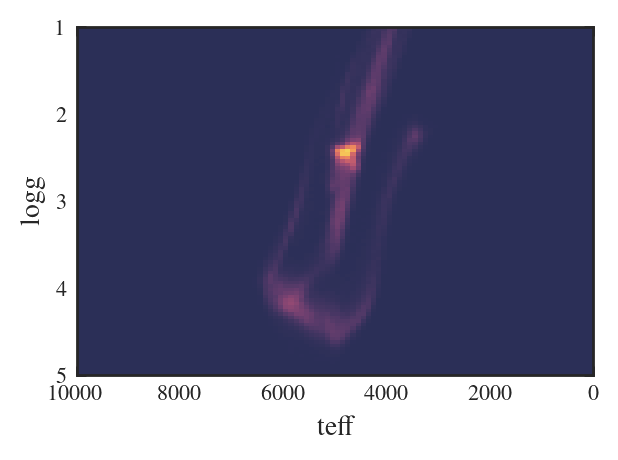

In [99]:
plt.hist2d(astroNN["TEFF"], astroNN["LOGG"], bins=100, range=((0, 10_000), (1, 5)))
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel("teff")
plt.ylabel("logg")

Text(0, 0.5, 'logg')

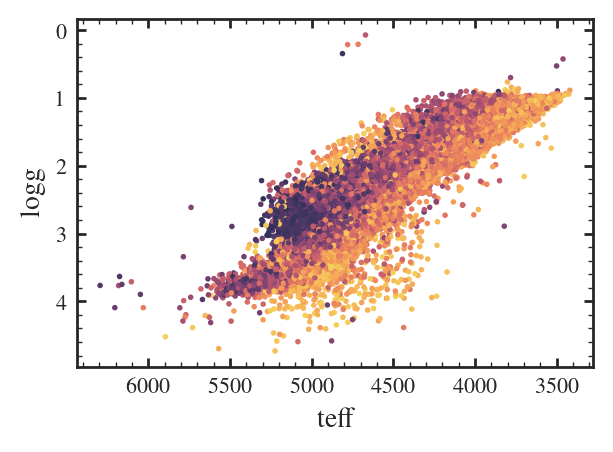

In [100]:
plt.scatter(df.TEFF, df.LOGG, c=df.age, s=1)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel("teff")
plt.ylabel("logg")

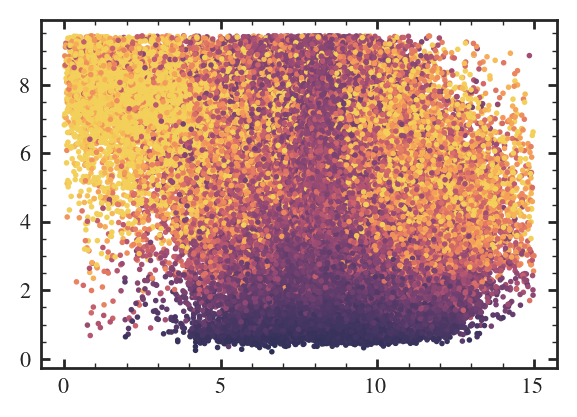

In [105]:
plt.scatter(df.galr, df.age, s=1, c=df.age_total_error, vmax=3)

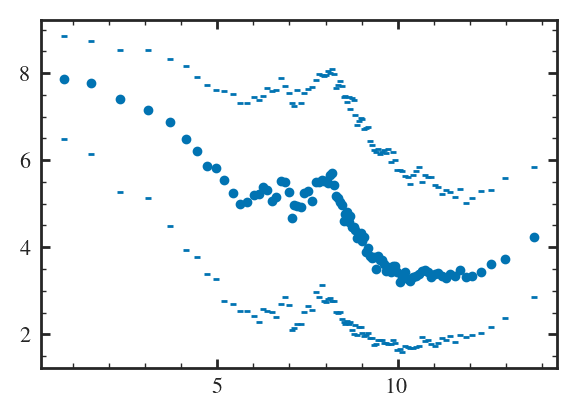

In [102]:
arya.medianplot(df, "galr", "age", binsize=1000)

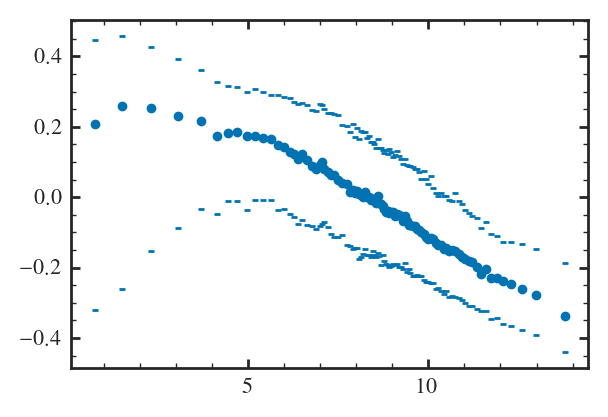

In [103]:
arya.medianplot(df, "galr", "O_H", binsize=1000, stat="median")

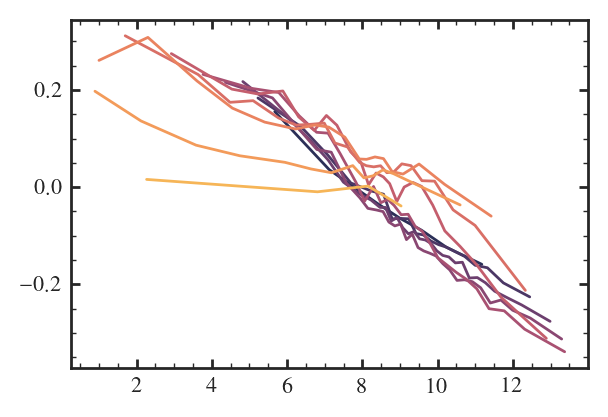

In [109]:
hm = arya.HueMap((0, 10))

for low in range(10):
    high = low + 1
    filt = df.age >= low
    filt &= df.age <= high
    arya.medianplot(df[filt], "galr", "O_H", binsize=500, stat="median", errorbar=None, color=hm(low), aes="line")

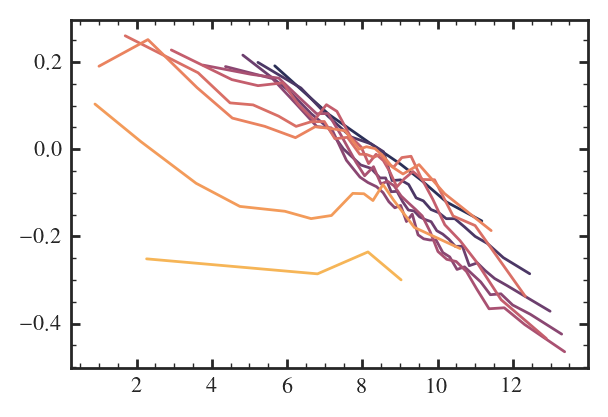

In [108]:
hm = arya.HueMap((0, 10))

for low in range(10):
    high = low + 1
    filt = df.age >= low
    filt &= df.age <= high
    arya.medianplot(df[filt], "galr", "FE_H", binsize=500, stat="median", errorbar=None, color=hm(low), aes="line")